# week 9: poisson process, birth-death, and the gillespie algorithm

## eeb463

## tomo parins-fukuchi

**how often do things happen?**

- amino acid substitutions along a protein
- speciation events in a large clade
- fossil deposition events

**how often do things happen?**

- typically might imagine a **rate**:
    - substitution rate
    - speciation rate
    - fossilization rate

**how often do things happen?**

- typically might imagine a **rate**:
    - substitution rate: how many substitutions occur per million years?
    - speciation rate: how many new species form per million years?
    - fossilization rate: how many fossils are preserved per million years?

**this offers us a simple approach to simulation**

- discretize time into steps
- check to see if an event happened, given rate, &lambda;



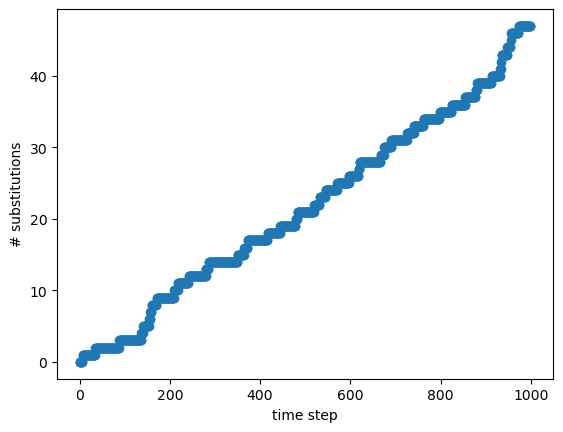

In [10]:
# how many substitutions occur in a protein after 1000 time steps?

import random
import matplotlib.pyplot as plt

n_subs = 0
stt = [n_subs]
rate = 0.05
for i in range(999):
    r = random.random()
    if r < rate:
        n_subs += 1
    stt.append(n_subs)

plt.plot([i for i in range(1000)], stt,"o")
plt.xlabel("time step")
plt.ylabel("# substitutions")
plt.show()

**how many events can we expect in time window $t$?**

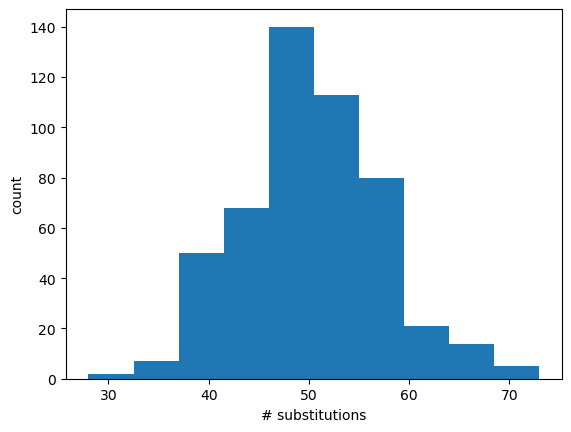

In [4]:
subs = []
for _ in range(500):
    n_subs = 0
    rate = 0.05
    for i in range(1000):
        r = random.random()
        if r < rate:
            n_subs += 1
    subs.append(n_subs)

plt.hist(subs)
plt.xlabel("# substitutions")
plt.ylabel("count")
plt.show()

**poisson distribution**

- discrete probability dist
- 1 param:
  - &lambda; -- how often do events happen?


**poisson pmf**

- probability of _k_ events in an interval, $t$:

$$\frac{(\lambda t)^ke^{-\lambda t}}{k!}$$

In [5]:
def factorial(n):
    nums = [i for i in range(n,1,-1)]
    prod = 1
    for i in nums:
        prod *= i
    return prod

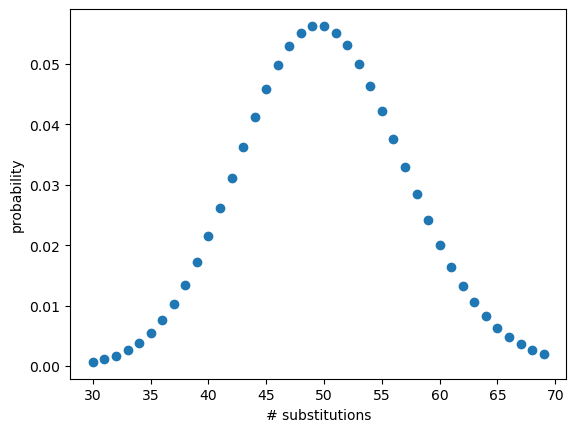

In [6]:
import math

def poisson_pmf(lam, t, k):
    num = ((lam*t)**k) * math.exp(-(lam*t))
    denom = factorial(k)
    return num / denom

probs = []
x = []
for i in range(30,70):
    probs.append(poisson_pmf(0.05,1000,i))
    x.append(i)
    
plt.plot(x,probs,"o")
plt.xlabel("# substitutions")
plt.ylabel("probability")
plt.show()



**poisson distribution**

- PD can be derived from the binomial dist
    - divided into sub-intervals, what is the probability of 'success' (there is an event) vs not (no event) ?
    - limiting case of the binomial where the number of trials approaches infinity
    


**poisson process**

- \# events (e.g., mutations) over time _t_ follows poisson distribution
- evolution of mutations over time can be modelled by a poisson _process_
    - index a poisson distribution over time

**how often do things happen?**
   - how often do we need to wait between events?

**poisson process**

- counts (\# events) over time follow a poisson distribution
- waiting times between events are _exponentially_ distributed


**exponential**

  - lopsided distribution
  - single parameter: "rate" (aka "lambda")



**exponential**

- cumulative density function:

![h:500 center](images/exponential_cdf.svg)



**exponential**

- probability density function:

![h:500 center](images/exponential_pdf.svg)


**exponential** (rate = 2)

probability density:

![h:500 center](images/exponential_prob.png)



**exponential** (rate = 20)

probability density:

![h:500 center](images/exponential_prob10.png)


**exponential** (rate = 0.2)

probability density:

![h:500 center](images/exponential_prob.2.png)

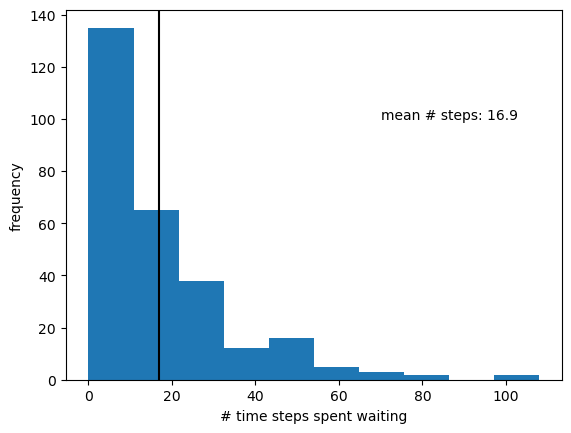

In [7]:
# collect waiting times between mutations

import random
import matplotlib.pyplot as plt
import numpy as np

n_subs = 0
w = []
curw = 0
rate = 0.05
for i in range(5000):
    r = random.random()
    if r < rate:
        n_subs += 1
        w.append(curw)
        curw = 0
    else:
        curw += 1

plt.hist(w)
plt.axvline(x=np.mean(w),color="black")
plt.text(70,100,"mean # steps: "+str(round(np.mean(w),2)))
plt.xlabel("# time steps spent waiting")
plt.ylabel("frequency")
plt.show()

**how often do things happen?**
- expect a substitution to occur about once every 20 time steps given &lambda; = 0.05
    - empirically, things seem to happen about every $ \frac{1}{\lambda} $ steps

**poisson process**
  - let's refer to the rate for the poisson processs as $\lambda_p$
  - times between events are exponential dist with:
      - rate: $\lambda_p $
      - expectation: $ \mu = \frac{1}{\lambda_p}$

**waiting times**

do these expectations actually align with what we see in the world?

**waiting times**

![bg right h:700](images/earthquakes.png)

**waiting times**

soccer goals (FIFA WC 1990-2000)

**waiting times**

![bg right h:700](images/goals.png)

**waiting times**

- american football scoring (GB packers 2023 season)

**waiting times**

![bg right h:700](images/all_pack.png)

**waiting times**

![bg right h:700](images/opp_scores.png)

**waiting times**

![bg right h:700](images/pack_scores.png)

**waiting times**

- exponentially distributed waiting times often a shockingly good fit
- occasionally less so
    - extension of basic poisson process may be more appropriate

**how can we simulate a poisson process?** 

- we've simulated a poisson process by:
    1. dividing a time frame into discrete slices
    2. checking to see if an event happened in each slice, with prob &lambda;

- there is a better way

**"gillespie" or "doob-gilespie" algorithm**

- general approach is to draw waiting times from an exponential distribution
  - determine when the "next" event is


**simulating exponential**

- _u_ is a random number between 0 and 1
- _rate_ is our exponential rate parameter

$$ \frac{\log(1-u)}{-rate} $$


**simulating exponential**

```
draw = random()
rate = 1        # can be any val > 0

r = math.log(1-draw) / (-rate)
```


In [20]:
import distributions as dist

lam = 0.05 # this will be our poisson process rate
exp = dist.exponential(lam)

curtime = 0.
nsub = 0
times = [curtime]
subs = [nsub]
while True:
    w = exp.sample(1)[0]
    curtime += w
    if curtime > 1000.:
        break
    times.append(curtime)
    nsub += 1
    subs.append(nsub)



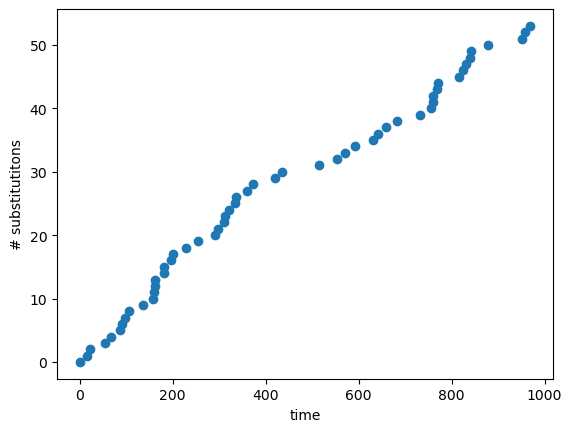

In [21]:
plt.plot(times,subs,"o")
plt.xlabel("time")
plt.ylabel("# substitutitons")
plt.show()

**poisson processes**

- there is a lot we can do with this


**birth-death process**

  - individuals stochastically:
    - arise (birth)
    - disappear (death)



**birth-death process**

- useful for modeling:
    - population growth
    - disease outbreak dynamics
    - phylogeny


**birth and death**

  - population increments by integers according to params
    - birth (_b_)
    - death (_d_)

  - each birth or death is referred to as an 'event'
      - let's model this as a poisson process
  - if population size reaches 0, simulation is over


**birth and death**

we assume that:
  - this process is _markovian_
  - events occur one at a time



**birth and death**

  - simplest version is a "pure birth" process
      - b > 0
      - d = 0
  - this is identical to our protein substitution example


**birth and death**

  - where b != d:
    - events are exponentially distributed with $\lambda = b+d$


**birth and death**

  - where b != d:
    - events are exponentially distributed with $\lambda = b+d$
    - probability of an event being a birth:
        - $\frac{b} { (b+d)}$
    - probability of an event being a death:
        - $\frac{d} { (b+d)}$


In [32]:
import distributions as dist

b = 0.025
d = 0.025
lam = b + d
exp = dist.exponential(lam)

curtime = 0.
n = 10
times = [curtime]
pop_size = [n]
while True:
    w = exp.sample(1)[0]
    curtime += w
    if curtime > 1000. or n == 0:
        break
    times.append(curtime)
    if b / (b + d) > random.random():
        n += 1
    else:
        n -= 1
    pop_size.append(n)
        
    

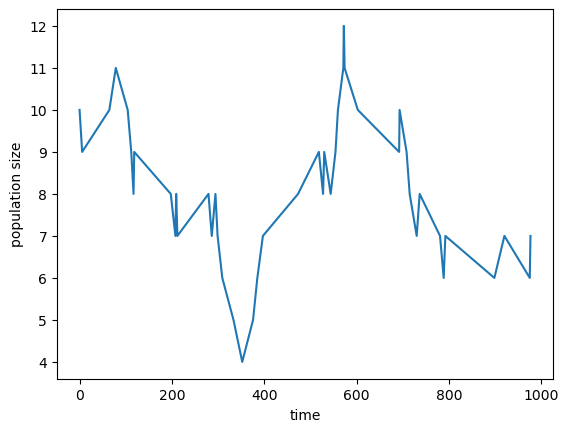

In [35]:
plt.plot(times,pop_size)
plt.xlabel("time")
plt.ylabel("population size")
plt.show()

**birth-death process**

- let's visualize the distribution of trends

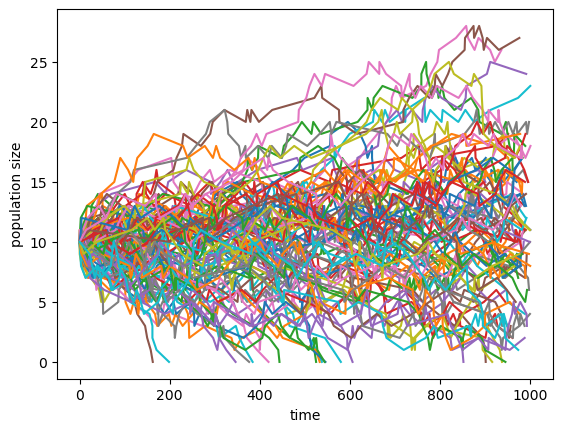

In [46]:
for _ in range(100):
    curtime = 0.
    n = 10
    times = [curtime]
    pop_size = [n]
    while True:
        w = exp.sample(1)[0]
        curtime += w
        if curtime > 1000. or n == 0:
            break
        times.append(curtime)
        if b / (b + d) > random.random():
            n += 1
        else:
            n -= 1
        pop_size.append(n)
    plt.plot(times,pop_size)

plt.xlabel("time")
plt.ylabel("population size")
plt.show()


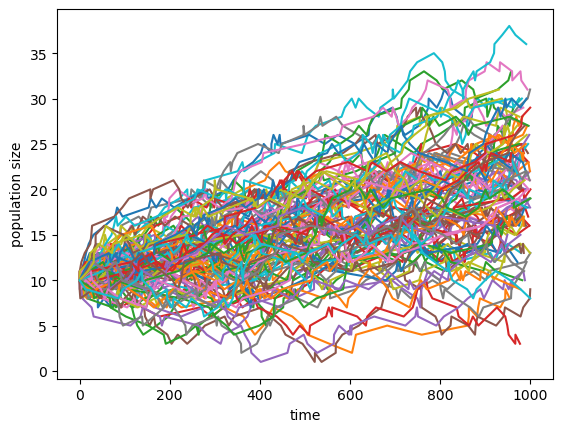

In [47]:
b, d = 0.3, 0.2
for _ in range(100):
    curtime = 0.
    n = 10
    times = [curtime]
    pop_size = [n]
    while True:
        w = exp.sample(1)[0]
        curtime += w
        if curtime > 1000. or n == 0:
            break
        times.append(curtime)
        if b / (b + d) > random.random():
            n += 1
        else:
            n -= 1
        pop_size.append(n)
    plt.plot(times,pop_size)

plt.xlabel("time")
plt.ylabel("population size")
plt.show()


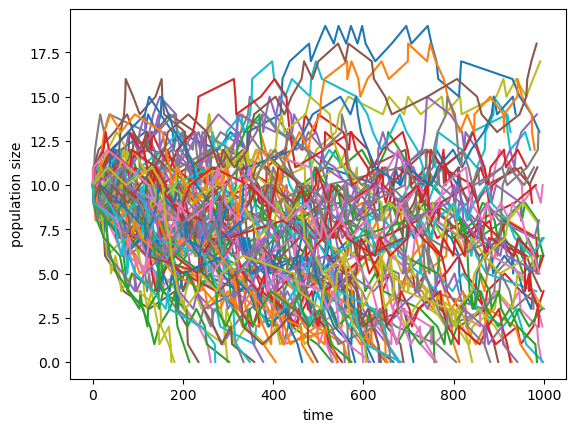

In [50]:
b, d = 0.2, 0.3
for _ in range(100):
    curtime = 0.
    n = 10
    times = [curtime]
    pop_size = [n]
    while True:
        w = exp.sample(1)[0]
        curtime += w
        if curtime > 1000. or n == 0:
            break
        times.append(curtime)
        if b / (b + d) > random.random():
            n += 1
        else:
            n -= 1
        pop_size.append(n)
    plt.plot(times,pop_size)

plt.xlabel("time")
plt.ylabel("population size")
plt.show()


**birth-death process**

   - this approach assumes that births and deaths happen at the same rate regardless of pop size
   - we might expect more events to occur when there are more individuals present
   - need to reparameterize as _per-capita_ rates

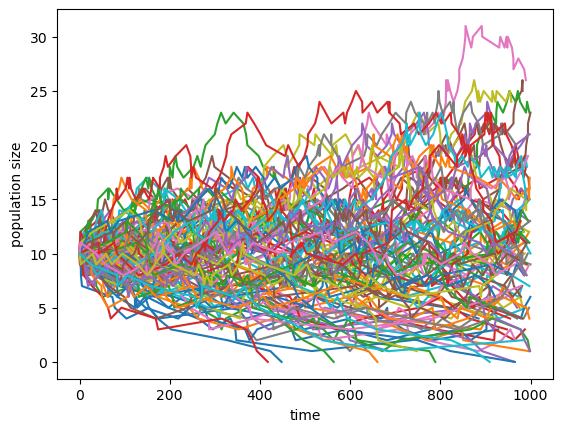

In [60]:
for _ in range(100):
    b, d = 0.0025, 0.0025 # starting per-capita rates
    curtime = 0.
    n = 10
    times = []
    pop_size = []
    exp = dist.exponential((b + d) * n )
    while curtime <= 1000:
        times.append(curtime)
        pop_size.append(n)
        if n == 0:
            break
        exp.rate = (b + d) * n
        w = exp.sample(1)[0]
        curtime += w
        if b / (b + d) > random.random():
            n += 1
        else:
            n -= 1


    plt.plot(times,pop_size)

plt.xlabel("time")
plt.ylabel("population size")
plt.show()

**birth-death process**

- n = 0 is an absorbing state
- given infinite time, all trajectories will go extinct
    - even if b > d

**birth-death process**

- it may be more biologically realistic to expect an equilibrium diversity


![bg right h:700](images/sepkoski.png)

**birth-death process**

- can also draw inference under bd process
- e.g., phylogenies


**birth-death process**

- likelihood of speciation events

![bg right h:700](images/phylogeny_model_bds_n_desc.svg)


**birth-death process**

- how often does speciation happen?
- probability of a species giving rise to $k$ descendants over time $t$ given rate &lambda;

$$P(n | t, \lambda ) = \frac{(\lambda t)^ke^{-\lambda t}}{k!}$$


**birth-death process**

- likelihood of extinction events

![bg right h:700](images/phylogeny_model_bds_extinction_t.svg)


**birth-death process**

- how often does extinction happen?
- probability of waiting time $t$ until extinction given extinction rate &mu;

$$P(e_t | t, \mu ) = \mu e^{-\mu t}$$


**birth-death process**

- molecular dating
- model sequence evolution as poisson process:
    - given mutation rate &mu;, what _t_ maximizes likelihood of observed sequence divergence?